In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

In [2]:
song_titles = []
song_artists = []

In [3]:
link = "https://www.billboard.com/charts/year-end/2022/hot-rap-songs/"

response = requests.get(link)
#print(response.status_code)

soup = BeautifulSoup(response.text, 'html.parser')

In [4]:
for song in soup.find_all("div", class_="o-chart-results-list-row-container"):
        song_name = song.find_all("h3", class_="c-title")
        song_titles.append(song_name[0].text.strip())
        print(song_name[0].text.strip(), end=", ")
        song_artist = song.find_all("span", class_="c-label")
        song_artists.append(song_artist[1].text.strip())
        print(song_artist[1].text.strip())

First Class, Jack Harlow
Wait For U, Future Featuring Drake & Tems
Big Energy, Latto
Super Gremlin, Kodak Black
Industry Baby, Lil Nas X & Jack Harlow
Jimmy Cooks, Drake Featuring 21 Savage
Vegas, Doja Cat
In A Minute, Lil Baby
Pushin P, Gunna & Future Featuring Young Thug
Sweetest Pie, Megan Thee Stallion & Dua Lipa
Super Freaky Girl, Nicki Minaj
Knife Talk, Drake Featuring 21 Savage & Project Pat
Way 2 Sexy, Drake Featuring Future & Young Thug
Broadway Girls, Lil Durk Featuring Morgan Wallen
What Happened To Virgil, Lil Durk Featuring Gunna
Puffin On Zootiez, Future
Girls Want Girls, Drake Featuring Lil Baby
To The Moon!, JNR CHOI & Sam Tompkins
Sticky, Drake
Who Want Smoke??, Nardo Wick Featuring G Herbo, Lil Durk & 21 Savage
Betty (Get Money), Yung Gravy
Cooped Up, Post Malone Featuring Roddy Ricch
F.N.F. (Let's Go), Hitkidd & GloRilla
Staying Alive, DJ Khaled Featuring Drake & Lil Baby
Sleazy Flow, SleazyWorld Go Featuring Lil Baby
Right On, Lil Baby
Get Into It (Yuh), Doja Cat
By

In [5]:
song_titles = song_titles[0:51]
song_artists = song_artists[0:51]

In [6]:
print(len(song_titles))
print(len(song_artists))

50
50


In [7]:
df = pd.DataFrame(list(zip(song_titles, song_artists)), columns =['Song Title', 'Artist'])

In [8]:
df

,Song Title,Artist
0,First Class,Jack Harlow
1,Wait For U,Future Featuring Drake & Tems
2,Big Energy,Latto
3,Super Gremlin,Kodak Black
4,Industry Baby,Lil Nas X & Jack Harlow
5,Jimmy Cooks,Drake Featuring 21 Savage
6,Vegas,Doja Cat
7,In A Minute,Lil Baby
8,Pushin P,Gunna & Future Featuring Young Thug
9,Sweetest Pie,Megan Thee Stallion & Dua Lipa


In [9]:
pattern = r'\s&.+|\sFeaturing.+|\sX.+'
df['Artist'] = df['Artist'].str.replace(pattern, '', regex=True)
df

,Song Title,Artist
0,First Class,Jack Harlow
1,Wait For U,Future
2,Big Energy,Latto
3,Super Gremlin,Kodak Black
4,Industry Baby,Lil Nas
5,Jimmy Cooks,Drake
6,Vegas,Doja Cat
7,In A Minute,Lil Baby
8,Pushin P,Gunna
9,Sweetest Pie,Megan Thee Stallion


In [10]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [11]:
with open("SpotifyAPI.txt", "r") as f:
    File = f.read()

client_id = File.split("\n")[0]
client_id = client_id.split(":")[1]
client_id = client_id.strip()

client_secret = File.split("\n")[1]
client_secret = client_secret.split(":")[1]
client_secret = client_secret.strip()

In [12]:
client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [13]:
result = sp.search(q='track:sicko mode artist:travis scott', type='track')
print(result['tracks']['items'][0]['uri'])

spotify:track:2xLMifQCjDGFmkHkpNLD9h


In [20]:
uri = []
for i, row in df.iterrows():
    results = sp.search(q=f'track:'+row["Song Title"]+' artist:'+row["Artist"], type='track')
    uri.append(results['tracks']['items'][0]['uri'])

df['URI'] = uri
df

,Song Title,Artist,URI
0,First Class,Jack Harlow,spotify:track:0wHFktze2PHC5jDt3B17DC
1,Wait For U,Future,spotify:track:59nOXPmaKlBfGMDeOVGrIK
2,Big Energy,Latto,spotify:track:6Zu3aw7FfjAF9WA0fA81Oq
3,Super Gremlin,Kodak Black,spotify:track:4A8cWXxKfIL3lAyUDzXbCF
4,Industry Baby,Lil Nas,spotify:track:27NovPIUIRrOZoCHxABJwK
5,Jimmy Cooks,Drake,spotify:track:3F5CgOj3wFlRv51JsHbxhe
6,Vegas,Doja Cat,spotify:track:0hquQWY3xvYqN4qtiquniF
7,In A Minute,Lil Baby,spotify:track:31lopd32BkJBTSgYE16c5e
8,Pushin P,Gunna,spotify:track:3XOalgusokruzA5ZBA2Qcb
9,Sweetest Pie,Megan Thee Stallion,spotify:track:7mFj0LlWtEJaEigguaWqYh


In [21]:
tempo = []
energy = []

for i in uri:
    audio_features = sp.audio_features(i)
    tempo.append(audio_features[0]['tempo'])
    energy.append(audio_features[0]['energy'])

df['Tempo'] = tempo
df['Energy'] = energy
df

,Song Title,Artist,URI,Tempo,Energy
0,First Class,Jack Harlow,spotify:track:0wHFktze2PHC5jDt3B17DC,107.005,0.582
1,Wait For U,Future,spotify:track:59nOXPmaKlBfGMDeOVGrIK,83.389,0.642
2,Big Energy,Latto,spotify:track:6Zu3aw7FfjAF9WA0fA81Oq,106.017,0.807
3,Super Gremlin,Kodak Black,spotify:track:4A8cWXxKfIL3lAyUDzXbCF,72.993,0.414
4,Industry Baby,Lil Nas,spotify:track:27NovPIUIRrOZoCHxABJwK,149.995,0.704
5,Jimmy Cooks,Drake,spotify:track:3F5CgOj3wFlRv51JsHbxhe,165.921,0.673
6,Vegas,Doja Cat,spotify:track:0hquQWY3xvYqN4qtiquniF,159.969,0.601
7,In A Minute,Lil Baby,spotify:track:31lopd32BkJBTSgYE16c5e,113.420,0.583
8,Pushin P,Gunna,spotify:track:3XOalgusokruzA5ZBA2Qcb,77.502,0.422
9,Sweetest Pie,Megan Thee Stallion,spotify:track:7mFj0LlWtEJaEigguaWqYh,123.977,0.628


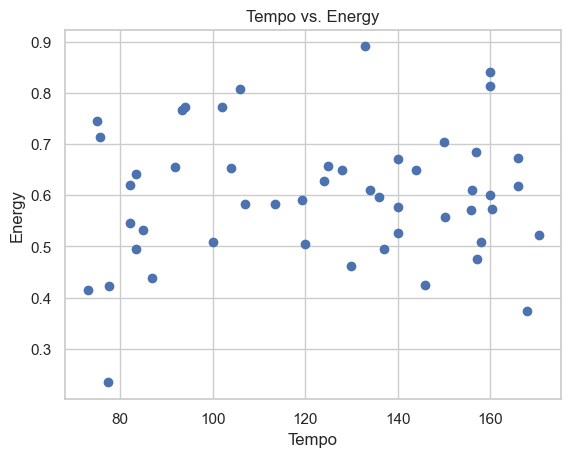

In [31]:
import matplotlib.pyplot as plt

plt.scatter(df['Tempo'], df['Energy'])
plt.xlabel('Tempo')
plt.ylabel('Energy')
plt.title('Tempo vs. Energy')
plt.show()
